In [1]:
from src.tensor import Tensor
import src.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
np.set_printoptions(suppress=True)

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
mnist_x_train, mnist_y_train = mndata.load_training()
mnist_x_test, mnist_y_test = mndata.load_testing()
x_train = Tensor(list(mnist_x_train))
x_test = Tensor(list(mnist_x_test))
y_train = Tensor(list(mnist_y_train))
y_test = Tensor(list(mnist_y_test))

In [3]:
rng = np.random.default_rng(seed=1)

# Scale down pixels from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# OneHot label vectors
def onehot(vector):
    tmp = []
    for scalar in vector.data:
        tmp2 = [1 if i==scalar else 0 for i in range(10)]
        tmp.append(tmp2)
    return Tensor(tmp)
y_train = onehot(y_train)
y_test = onehot(y_test)

print(f'x_train={x_train.shape}, y_train={y_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')

x_train=(60000, 784), y_train=(60000, 10)
x_test=(10000, 784), y_test=(10000, 10)


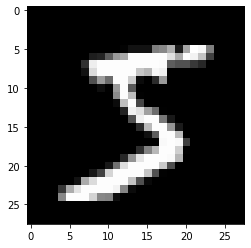

In [4]:
# Visualize X
img = np.array(x_train[0].tolist())
plt.imshow(img.reshape(28, 28),cmap='gray')
plt.show()

In [21]:
# Multinomial sampling with replacement
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * x_train.shape[0])
    batch = [draw() for _ in range(batch_size)]
    return x_train[batch], y_train[batch]

mlp = nn.MLP((
    nn.Linear(784, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 10, bias=False),
    nn.Softmax()
))
mlp[0].W = mlp[0].W * 0.11
mlp[2].W = mlp[2].W * 0.07
losses = []

std=1.0314052922535408
std=0.9594056701248558
std=10.912434156434799
Epoch 0: 16.360450459584534
Epoch 1: 27.310997555405386
Epoch 2: 40.349010437534005
Epoch 3: 33.92315791087334
Epoch 4: 37.839748787657456
Epoch 5: 52.27123401532268
Epoch 6: 42.153990134360704
Epoch 7: 49.62047490812951
Epoch 8: 21.84644156310128
Epoch 9: 33.873867894652555
Epoch 10: 18.057870132105663
Epoch 11: 17.410642785823903
Epoch 12: 22.7055093197589
Epoch 13: 12.527545626902823
Epoch 14: 18.812059199280927
Epoch 15: 12.792002091611492
Epoch 16: 13.230300270652762
Epoch 17: 12.794174732137238
Epoch 18: 10.583093924428596
Epoch 19: 6.906472695788104
Epoch 20: 12.865081900912019
Epoch 21: 9.46662141280245
Epoch 22: 7.1725297811317965
Epoch 23: 13.65030962355433
Epoch 24: 9.544784276014777
Epoch 25: 4.897358204175234
Epoch 26: 5.444713377558163
Epoch 27: 4.709949515722001
Epoch 28: 5.217839898180293
Epoch 29: 4.678662053368921
Epoch 30: 7.54359031727765
Epoch 31: 6.914049947142322
Epoch 32: 2.9012109719443364
Epo

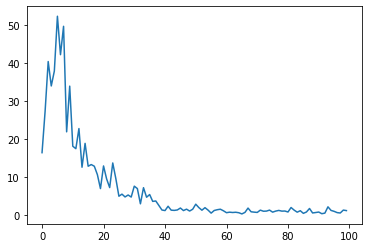

In [22]:
epochs = 100
batch_size = 32
lr = 0.1
breakpoint = -1
for e in range(epochs):
    x, y = draw_batch(batch_size)
    out = mlp(x, breakpoint=breakpoint, printstddev=(e==0))

    loss = nn.nlll(out, y, reduction='mean')
    loss.backward()
    mlp.optimize(lr=lr)
    mlp.zero_grad()

    losses.append(loss.data.item())
    print(f'Epoch {e}: {loss.data.item()}')

plt.plot(losses)
plt.show()

In [24]:
correct = 0
for i in range(len(x_test)):
    y = y_test[i]
    x = mlp(x_test[i])
    corr = np.argmax(y.data)
    predicted = np.argmax(x.data)
    if predicted == corr: correct += 1

print(f'Test accuracy: {(correct/len(x_test.data))*100}%')

Test accuracy: 81.02000000000001%
